In [39]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

In [40]:
# Plots
# ==============================================================================
import matplotlib.pyplot as plt
#plt.style.use('seaborn-v0_8-darkgrid')

In [41]:
#!pip install skforecast

In [42]:
# Modelling and Forecasting
# ==============================================================================
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.preprocessing import TimeSeriesDifferentiator
from sklearn.metrics import mean_absolute_error

In [43]:
# Download data
# ==============================================================================
url = (
    'https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/'
    'master/data/AirPassengers.csv'
)
data = pd.read_csv(url, sep=',')

# Data preprocessing
# ==============================================================================
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
data = data.set_index('Date')
data = data.asfreq('MS')
data = data['Passengers']
data = data.sort_index()
data.head(4)

Date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
Freq: MS, Name: Passengers, dtype: int64

In [44]:
# Data differentiated
# ==============================================================================
diferenciator = TimeSeriesDifferentiator(order=1)
data_diff = diferenciator.fit_transform(data)
data_diff = pd.Series(data_diff, index=data.index).dropna()
data_diff.head(4)

C:\Users\jose.lozas\AppData\Roaming\Python\Python39\site-packages\skforecast\preprocessing\preprocessing.py:82: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.initial_values.append(X[0])
C:\Users\jose.lozas\AppData\Roaming\Python\Python39\site-packages\skforecast\preprocessing\preprocessing.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.last_values.append(X[-1])


Date
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
Freq: MS, dtype: float64

C:\Users\jose.lozas\AppData\Local\Temp\ipykernel_23712\2226184538.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.loc[:end_train].plot(ax=axs[0], label='train')
C:\Users\jose.lozas\AppData\Local\Temp\ipykernel_23712\2226184538.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.loc[:end_train].plot(ax=axs[0], label='train')
C:\Users\jose.lozas\AppData\Local\Temp\ipykernel_23712\2226184538.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.loc[end_train:].plot(ax=axs[0], label='test')
C:\Users\jose.lozas\AppData\Local\Temp\ipykernel_23712\2226184538.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.loc[end_train:].plot(ax=axs[0], label='test')
C:\Users\jose.lozas\AppData\Local\Temp\ipykernel_23712\2226184538.py:20: FutureWarning: 'M' is dep

Train dates : 1949-01-01 00:00:00 --- 1955-12-01 00:00:00  (n=84)
Test dates  : 1956-01-01 00:00:00 --- 1960-12-01 00:00:00  (n=60)


C:\Users\jose.lozas\AppData\Local\Temp\ipykernel_23712\2226184538.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_diff.loc[end_train:].plot(ax=axs[1], label='test')
C:\Users\jose.lozas\AppData\Local\Temp\ipykernel_23712\2226184538.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_diff.loc[end_train:].plot(ax=axs[1], label='test')


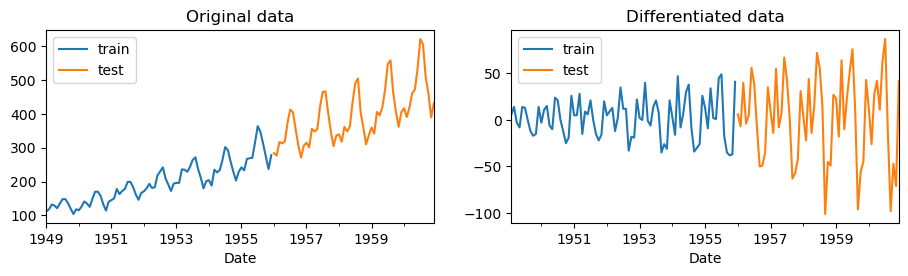

In [45]:
# Data partition train-test
# ==============================================================================
end_train = '1955-12-01 23:59:59'
print(
    f"Train dates : {data.index.min()} --- {data.loc[:end_train].index.max()}  " 
    f"(n={len(data.loc[:end_train])})")
print(
    f"Test dates  : {data.loc[end_train:].index.min()} --- {data.index.max()}  "
    f"(n={len(data.loc[end_train:])})")

# Plot
# ==============================================================================
fig, axs = plt.subplots(1, 2, figsize=(11, 2.5))
axs = axs.ravel()
data.loc[:end_train].plot(ax=axs[0], label='train')
data.loc[end_train:].plot(ax=axs[0], label='test')
axs[0].legend()
axs[0].set_title('Original data')

data_diff.loc[:end_train].plot(ax=axs[1], label='train')
data_diff.loc[end_train:].plot(ax=axs[1], label='test')
axs[1].legend()
axs[1].set_title('Differentiated data');

Error (MAE) Random Forest: 66.10
Error (MAE) Gradient Boosting: 55.38


C:\Users\jose.lozas\AppData\Local\Temp\ipykernel_23712\928442903.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.loc[:end_train].plot(ax=ax, label='train')
C:\Users\jose.lozas\AppData\Local\Temp\ipykernel_23712\928442903.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.loc[:end_train].plot(ax=ax, label='train')
C:\Users\jose.lozas\AppData\Local\Temp\ipykernel_23712\928442903.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.loc[end_train:].plot(ax=ax, label='test')
C:\Users\jose.lozas\AppData\Local\Temp\ipykernel_23712\928442903.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.loc[end_train:].plot(ax=ax, label='test')
C:\Users\jose.lozas\AppData\Local\Temp\ipykernel_23712\928442903.py:33: FutureWarning: 'M' is deprecated and will be r

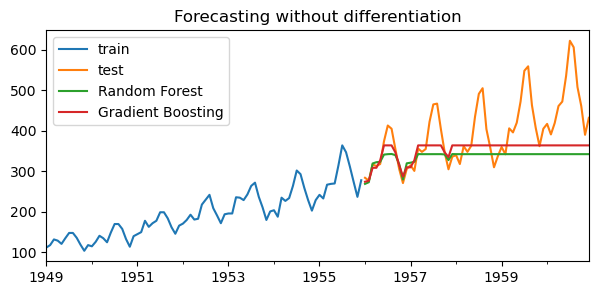

In [46]:
# Forecasting without differentiation
# ==============================================================================
steps = len(data.loc[end_train:])

# Forecasters
forecaster_rf = ForecasterAutoreg(
                    regressor = RandomForestRegressor(random_state=963),
                    lags      = 12
                )
forecaster_gb = ForecasterAutoreg(
                    regressor = XGBRegressor(random_state=963),
                    lags      = 12
                )

# Train
forecaster_rf.fit(data.loc[:end_train])
forecaster_gb.fit(data.loc[:end_train])

# Predict
predictions_rf = forecaster_rf.predict(steps=steps)
predictions_gb = forecaster_gb.predict(steps=steps)

# Error
error_rf = mean_absolute_error(data.loc[end_train:], predictions_rf)
error_gb = mean_absolute_error(data.loc[end_train:], predictions_gb)
print(f"Error (MAE) Random Forest: {error_rf:.2f}")
print(f"Error (MAE) Gradient Boosting: {error_gb:.2f}")

# Plot
fig, ax = plt.subplots(figsize=(7, 3), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_rf.plot(ax=ax, label='Random Forest')
predictions_gb.plot(ax=ax, label='Gradient Boosting')
ax.set_title(f'Forecasting without differentiation')
ax.set_xlabel('')
ax.legend();

Error (MAE) Random Forest: 53.76
Error (MAE) Gradient Boosting: 29.77


C:\Users\jose.lozas\AppData\Local\Temp\ipykernel_23712\1691455364.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.loc[:end_train].plot(ax=ax, label='train')
C:\Users\jose.lozas\AppData\Local\Temp\ipykernel_23712\1691455364.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.loc[:end_train].plot(ax=ax, label='train')
C:\Users\jose.lozas\AppData\Local\Temp\ipykernel_23712\1691455364.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.loc[end_train:].plot(ax=ax, label='test')
C:\Users\jose.lozas\AppData\Local\Temp\ipykernel_23712\1691455364.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.loc[end_train:].plot(ax=ax, label='test')
C:\Users\jose.lozas\AppData\Local\Temp\ipykernel_23712\1691455364.py:35: FutureWarning: 'M' is deprecated and will

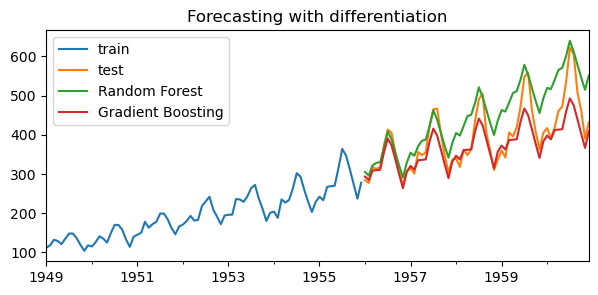

In [47]:
# Forecasting with differentiation
# ==============================================================================
steps = len(data.loc[end_train:])

# Forecasters
forecaster_rf = ForecasterAutoreg(
                    regressor       = RandomForestRegressor(random_state=963),
                    lags            = 12,
                    differentiation = 1
                )
forecaster_gb = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 12,
                    differentiation = 1
                )

# Train
forecaster_rf.fit(data.loc[:end_train])
forecaster_gb.fit(data.loc[:end_train])

# Predict
predictions_rf = forecaster_rf.predict(steps=steps)
predictions_gb = forecaster_gb.predict(steps=steps)

# Error
error_rf = mean_absolute_error(data.loc[end_train:], predictions_rf)
error_gb = mean_absolute_error(data.loc[end_train:], predictions_gb)
print(f"Error (MAE) Random Forest: {error_rf:.2f}")
print(f"Error (MAE) Gradient Boosting: {error_gb:.2f}")

# Plot
fig, ax = plt.subplots(figsize=(7, 3), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_rf.plot(ax=ax, label='Random Forest')
predictions_gb.plot(ax=ax, label='Gradient Boosting')
ax.set_title(f'Forecasting with differentiation')
ax.set_xlabel('')
ax.legend();

In [48]:
# Differentiation with TimeSeriesDifferentiator
# ==============================================================================
y = np.array([5, 8, 12, 10, 14, 17, 21, 19], dtype=float)
diffenciator = TimeSeriesDifferentiator()
diffenciator.fit(y)
y_diff = diffenciator.transform(y)

print(f"Original time series   : {y}")
print(f"Differenced time series: {y_diff}")

Original time series   : [ 5.  8. 12. 10. 14. 17. 21. 19.]
Differenced time series: [nan  3.  4. -2.  4.  3.  4. -2.]


In [49]:
# Inverse transform
# ==============================================================================
diffenciator.inverse_transform(y_diff)

array([ 5.,  8., 12., 10., 14., 17., 21., 19.])

In [50]:
# Time series differentiated by preprocessing before training
# ==============================================================================
diferenciator = TimeSeriesDifferentiator(order=1)
data_diff = diferenciator.fit_transform(data)
data_diff = pd.Series(data_diff, index=data.index).dropna()

forecaster = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=963),
                 lags      = 15
             )
forecaster.fit(y=data_diff.loc[:end_train])
predictions_diff = forecaster.predict(steps=steps)

# Revert differentiation to obtain final predictions
last_value_train = data.loc[:end_train].iloc[[-1]]
predictions_1 = pd.concat([last_value_train, predictions_diff]).cumsum()[1:]
predictions_1 = predictions_1.asfreq('MS')
predictions_1.name = 'pred'
predictions_1.head(5)

C:\Users\jose.lozas\AppData\Roaming\Python\Python39\site-packages\skforecast\preprocessing\preprocessing.py:82: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.initial_values.append(X[0])
C:\Users\jose.lozas\AppData\Roaming\Python\Python39\site-packages\skforecast\preprocessing\preprocessing.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.last_values.append(X[-1])


1956-01-01    303.18
1956-02-01    293.70
1956-03-01    322.68
1956-04-01    326.52
1956-05-01    326.79
Freq: MS, Name: pred, dtype: float64

In [51]:
# Time series differentiated internally by the forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                 regressor       = RandomForestRegressor(random_state=963),
                 lags            = 15,
                 differentiation = 1
             )
forecaster.fit(y=data.loc[:end_train])
predictions_2 = forecaster.predict(steps=steps)
predictions_2.head(5)

1956-01-01    303.18
1956-02-01    293.70
1956-03-01    322.68
1956-04-01    326.52
1956-05-01    326.79
Freq: MS, Name: pred, dtype: float64

In [52]:
# Compare both predictions
# ==============================================================================
pd.testing.assert_series_equal(predictions_1, predictions_2)

In [53]:
# Backtesting with the time series differentiated by preprocessing before training
# ==============================================================================
steps = 5
forecaster_1 = ForecasterAutoreg(
                   regressor = RandomForestRegressor(random_state=963),
                   lags      = 15
               )

_, predictions_1 = backtesting_forecaster(
                       forecaster            = forecaster_1,
                       y                     = data_diff,
                       steps                 = steps,
                       metric                = 'mean_squared_error',
                       initial_train_size    = len(data_diff.loc[:end_train]),
                       fixed_train_size      = False,
                       gap                   = 0,
                       allow_incomplete_fold = True,
                       refit                 = True,
                       n_jobs                = 'auto',
                       verbose               = False,
                       show_progress         = True  
                   )

# Revert differentiation of predictions. Predictions of each fold must be reverted
# individually. An id is added to each prediction to identify the fold to which it belongs.
predictions_1 = predictions_1.rename(columns={'pred': 'pred_diff'})
folds = len(predictions_1) / steps
folds = int(np.ceil(folds))
predictions_1['backtesting_fold_id'] = np.repeat(range(folds), steps)[:len(predictions_1)]

# Add the previously observed value of the time series (only to the first prediction of each fold)
previous_overved_values = data.shift(1).loc[predictions_1.index].iloc[::steps]
previous_overved_values.name = 'previous_overved_value'
predictions_1 = predictions_1.merge(
                    previous_overved_values,
                    left_index  = True,
                    right_index = True,
                    how         = 'left'
                )
predictions_1 = predictions_1.fillna(0)
predictions_1['summed_value'] = (
    predictions_1['pred_diff'] + predictions_1['previous_overved_value']
)

# Revert differentiation using the cumulative sum by fold
predictions_1['pred'] = (
    predictions_1
    .groupby('backtesting_fold_id')
    .apply(lambda x: x['summed_value'].cumsum())
    .to_numpy()
)

predictions_1.head(5)

  0%|          | 0/12 [00:00<?, ?it/s]

C:\Users\jose.lozas\AppData\Local\Temp\ipykernel_23712\227738721.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  predictions_1
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\formatters.py:345: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\formatters.py:345: FutureWarning: DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,pred_diff,backtesting_fold_id,previous_overved_value,summed_value,pred
1956-01-01,25.18,0,278.0,303.18,303.18
1956-02-01,-9.48,0,0.0,-9.48,293.70
1956-03-01,28.98,0,0.0,28.98,322.68
1956-04-01,3.84,0,0.0,3.84,326.52
1956-05-01,0.27,0,0.0,0.27,326.79


In [54]:
# Backtesting with the time series differentiated internally
# ==============================================================================
forecaster_2 = ForecasterAutoreg(
                   regressor       = RandomForestRegressor(random_state=963),
                   lags            = 15,
                   differentiation = 1
               )

_, predictions_2 = backtesting_forecaster(
                       forecaster            = forecaster_2,
                       y                     = data,
                       steps                 = steps,
                       metric                = 'mean_squared_error',
                       initial_train_size    = len(data.loc[:end_train]),
                       fixed_train_size      = False,
                       gap                   = 0,
                       allow_incomplete_fold = True,
                       refit                 = True,
                       n_jobs                = 'auto',
                       verbose               = False,
                       show_progress         = True  
                   )

predictions_2.head(5)

  0%|          | 0/12 [00:00<?, ?it/s]

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\formatters.py:345: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\formatters.py:345: FutureWarning: DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,pred
1956-01-01,303.18
1956-02-01,293.70
1956-03-01,322.68
1956-04-01,326.52
1956-05-01,326.79


In [55]:
# Compare both predictions
# ==============================================================================
pd.testing.assert_series_equal(predictions_1['pred'], predictions_2['pred'])

In [56]:
import session_info
session_info.show(html=False)

ModuleNotFoundError: No module named 'session_info'